In [ ]:
!wget https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/raw/master/data/coco.names
!pip install numpy

--2024-12-19 10:37:29--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg [following]
--2024-12-19 10:37:29--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.2’

yolov3.cfg.2        100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-12-19 10:37:29 (63.0 MB/s) - ‘yolov3.cfg.2’ saved [8342/8342]

--2024-12-19 10:37:29--  https://pjreddie.com/media/files/yolov3.weig

Saving sample2.jpg to sample2.jpg


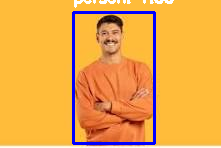

In [21]:
import cv2
from google.colab.patches import cv2_imshow

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Upload an image
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name)
    height, width, _ = img.shape

    # Preprocess the image
    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)
    layer_names = net.getUnconnectedOutLayersNames()
    outputs = net.forward(layer_names)

    # Postprocess the results
    boxes = []
    confidences = []
    class_ids = []
    confidence_threshold = 0.5  # Minimum confidence
    nms_threshold = 0.4        # NMS threshold

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = scores.argmax()
            confidence = scores[class_id]
            if confidence > confidence_threshold:
                center_x, center_y, w, h = (detection[0:4] * [width, height, width, height]).astype("int")
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply NMS
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)
    for i in indices:
       # i = i[0]
        box = boxes[i]
        x, y, w, h = box[0], box[1], box[2], box[3]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, f"{label}: {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Show the output
    cv2_imshow(img)
